### Supervised Learning Models
# Logistic regression

In [107]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, GridSearchCV, StratifiedKFold
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, confusion_matrix, 
                             classification_report, roc_curve, auc)
import warnings
warnings.filterwarnings('ignore')

In [108]:
# Adding random seed for reproducability 
np.random.seed(42)

In [109]:
# Loading data

# Test data 
train_data = pd.read_csv('framingham_train_processed.csv')
print(f"Training data shape: {train_data.shape}")

# Training data
test_data = pd.read_csv('framingham_test_processed.csv')
print(f"Test data shape: {test_data.shape}")

Training data shape: (3390, 16)
Test data shape: (848, 16)


In [110]:
# Seperate features (X) from target variable (Y)
# Train
X_train = train_data.drop('TenYearCHD', axis=1)
y_train = train_data['TenYearCHD']

# Test
X_test = test_data.drop('TenYearCHD', axis=1)
y_test = test_data['TenYearCHD']

print("Data separated into features (X) and target (y)")
print(f"  X_train shape: {X_train.shape}")
print(f"  y_train shape: {y_train.shape}")
print(f"  X_test shape: {X_test.shape}")
print(f"  y_test shape: {y_test.shape}")
print()

print("First 5 rows of FEATURES (X_train):")
print(X_train.head())
print()

print("First 5 rows of TARGET (y_train):")
print(y_train.head())
print()

# Check the feature names
print("Feature names (15 total):")
print(list(X_train.columns))
print()

Data separated into features (X) and target (y)
  X_train shape: (3390, 15)
  y_train shape: (3390,)
  X_test shape: (848, 15)
  y_test shape: (848,)

First 5 rows of FEATURES (X_train):
        age  cigsPerDay   totChol     sysBP     diaBP       BMI  heartRate  \
0  0.160422   -0.751499  1.109942  0.187178  0.308956 -0.244064  -0.492725   
1  1.094437   -0.751499  0.973412 -0.017371  0.435256  0.161465   0.173113   
2  0.860933    0.084843 -0.687694  0.391726  0.014257  0.525713  -1.075334   
3 -1.707608   -0.500596  1.041677 -0.971931  0.098457  0.875391   0.339573   
4 -0.773593    0.503014  1.792588  0.005357 -0.533042  1.390195   1.588020   

    glucose  male  currentSmoker  BPMeds  prevalentStroke  prevalentHyp  \
0  0.060544   0.0            0.0     0.0              0.0           0.0   
1  0.277917   0.0            0.0     0.0              0.0           0.0   
2 -0.548101   1.0            1.0     0.0              0.0           1.0   
3 -0.156829   1.0            1.0     0.0    

In [111]:
# Class imbalance handeling
# The model needs to know about the class imbalance

# Training data
class_counts = y_train.value_counts().sort_index()

print(f'Training data class counts: {class_counts}')
print()

# Calculate percentages
class_percentages = y_train.value_counts(normalize=True).sort_index() * 100
print("Training data percentages:")
print(f"  Class 0 (No Disease): {class_percentages[0]:.1f}%")
print(f"  Class 1 (Disease):    {class_percentages[1]:.1f}%")
print()

# Test data
test_class_counts = y_test.value_counts().sort_index()
print(test_class_counts)
print()

print(f'Test data class counts: {test_class_counts}')
print()

# Calculate percentages
test_class_percentages = y_test.value_counts(normalize=True).sort_index() * 100
print("Test data percentages:")
print(f"  Class 0 (No Disease): {test_class_percentages[0]:.1f}%")
print(f"  Class 1 (Disease):    {test_class_percentages[1]:.1f}%")
print()


Training data class counts: TenYearCHD
0    2875
1     515
Name: count, dtype: int64

Training data percentages:
  Class 0 (No Disease): 84.8%
  Class 1 (Disease):    15.2%

TenYearCHD
0    719
1    129
Name: count, dtype: int64

Test data class counts: TenYearCHD
0    719
1    129
Name: count, dtype: int64

Test data percentages:
  Class 0 (No Disease): 84.8%
  Class 1 (Disease):    15.2%



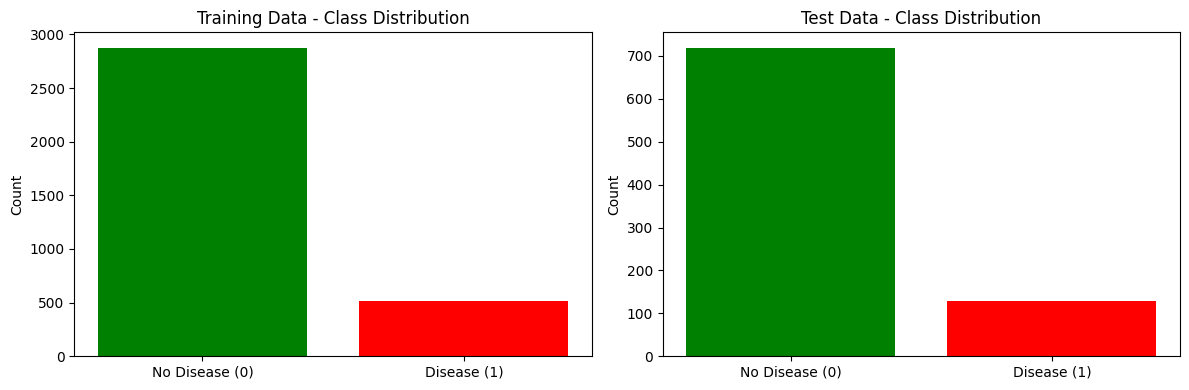

In [112]:
# Visualization of class imbalance
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Training data
axes[0].bar(['No Disease (0)', 'Disease (1)'], class_counts.values, color=['green', 'red'])
axes[0].set_title('Training Data - Class Distribution')
axes[0].set_ylabel('Count')

# Test data
axes[1].bar(['No Disease (0)', 'Disease (1)'], test_class_counts.values, color=['green', 'red'])
axes[1].set_title('Test Data - Class Distribution')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [113]:
"""
SETTING UP CROSS-VALIDATION

1. Split training data into 5 equal parts (folds)
2. Train on 4 folds, test on 1 fold")
3. Repeat 5 times (each fold gets a turn as test)
4. Average the results
"""

# Number of folds : n_splits=5
# Randomize data before splitting: shuffle=True
# For reproducability: random_state=42
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [114]:
# Define hyper parameter grid
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'class_weight': ['balanced', None]
}

print("Hyperparameter combinations to test:")
print(f"  C values: {param_grid_lr['C']}")
print(f"  class_weight values: {param_grid_lr['class_weight']}")
print()

num_combinations = len(param_grid_lr['C']) * len(param_grid_lr['class_weight'])
print(f"Total combinations: {num_combinations}")
print(f"With 5-fold CV, this means: {num_combinations * 5} model trainings")
print()

Hyperparameter combinations to test:
  C values: [0.001, 0.01, 0.1, 1, 10, 100]
  class_weight values: ['balanced', None]

Total combinations: 12
With 5-fold CV, this means: 60 model trainings



In [115]:
# Create base model

lr_base = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)

In [116]:
"""
Grid search with hyperparameters

GridSearchCV will:
    1. Try each combination of hyperparameters
    2. Use 5-fold cross-validation to evaluate each
    3. Keep track of which combination performs best
    4. Return the best model
"""

grid_search_lr = GridSearchCV(
    estimator=lr_base,
    param_grid=param_grid_lr,
    cv=cv,
    scoring='roc_auc',  # Use ROC-AUC as the metric to optimize
    n_jobs=-1, 
    verbose=1  
)

# Fit the grid search 
grid_search_lr.fit(X_train, y_train)

print()
print("Grid Search Complete!")
print()

Fitting 5 folds for each of 12 candidates, totalling 60 fits

Grid Search Complete!



In [117]:
# Examine results
print(f"Best parameters: {grid_search_lr.best_params_}")
print(f"Best cross-validation ROC-AUC score: {grid_search_lr.best_score_:.4f}")
print()

# Get the best model
lr_model = grid_search_lr.best_estimator_

results_df = pd.DataFrame(grid_search_lr.cv_results_)
results_df = results_df[['param_C', 'param_class_weight', 'mean_test_score', 'std_test_score']]
results_df.columns = ['C', 'class_weight', 'Mean ROC-AUC', 'Std ROC-AUC']
results_df = results_df.sort_values('Mean ROC-AUC', ascending=False)

print("Top 5 hyperparameter combinations:")
print(results_df.head())

Best parameters: {'C': 0.01, 'class_weight': 'balanced'}
Best cross-validation ROC-AUC score: 0.7331

Top 5 hyperparameter combinations:
      C class_weight  Mean ROC-AUC  Std ROC-AUC
2  0.01     balanced      0.733089     0.026067
3  0.01         None      0.732650     0.025615
4  0.10     balanced      0.732322     0.025060
5  0.10         None      0.732316     0.023825
7  1.00         None      0.731569     0.022917


In [118]:
# Saving model for later use
import pickle

with open('lr_model.pkl', 'wb') as f:
    pickle.dump(lr_model, f)
print("Model saved as 'lr_model.pkl' for later use")
print()

Model saved as 'lr_model.pkl' for later use



## Evaluating the model

In [119]:
# Opening the linear regression model
with open('lr_model.pkl', 'rb') as f:
    lr_model = pickle.load(f)

In [120]:
# Define metrics for evaluation
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Using 5 fold cross-validation for evaluation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)



In [121]:
# Perform cross-validation with all metrics
cv_results = cross_validate(
    lr_model, 
    X_train, 
    y_train, 
    cv=cv, 
    scoring=scoring,
    return_train_score=True
)

In [122]:
# Display results
for metric in scoring.keys():
    train_scores = cv_results[f'train_{metric}']
    test_scores = cv_results[f'test_{metric}']
    
    print(f"{metric.upper()}:")
    print(f"  Training:  {train_scores.mean():.4f} (±{train_scores.std():.4f})")
    print(f"  CV Test:   {test_scores.mean():.4f} (±{test_scores.std():.4f})")
    print(f"  Individual folds: {[f'{score:.4f}' for score in test_scores]}")
    print()


ACCURACY:
  Training:  0.6774 (±0.0018)
  CV Test:   0.6735 (±0.0163)
  Individual folds: ['0.6770', '0.6593', '0.6504', '0.6932', '0.6873']

PRECISION:
  Training:  0.2763 (±0.0020)
  CV Test:   0.2727 (±0.0149)
  Individual folds: ['0.2820', '0.2538', '0.2555', '0.2892', '0.2829']

RECALL:
  Training:  0.6937 (±0.0091)
  CV Test:   0.6874 (±0.0284)
  Individual folds: ['0.7282', '0.6408', '0.6796', '0.6990', '0.6893']

F1:
  Training:  0.3952 (±0.0033)
  CV Test:   0.3903 (±0.0190)
  Individual folds: ['0.4065', '0.3636', '0.3714', '0.4091', '0.4011']

ROC_AUC:
  Training:  0.7395 (±0.0060)
  CV Test:   0.7331 (±0.0261)
  Individual folds: ['0.7543', '0.7161', '0.7011', '0.7720', '0.7219']



In [123]:
# Interpret CV evaluation results
avg_accuracy = cv_results['test_accuracy'].mean()
avg_recall = cv_results['test_recall'].mean()
avg_precision = cv_results['test_precision'].mean()
avg_f1 = cv_results['test_f1'].mean()
avg_roc_auc = cv_results['test_roc_auc'].mean()

# Printing the results
print(f"Average Accuracy: {avg_accuracy:.1%}")
print(f"  What this means: Model is correct {avg_accuracy:.1%} of the time")
print()

print(f"Average Recall: {avg_recall:.1%}")
print(f"  What this means: Model catches {avg_recall:.1%} of actual disease cases")
print(f"  (This is critical for medical prediction!)")
print()

print(f"Average Precision: {avg_precision:.1%}")
print(f"  What this means: When model predicts disease, it's right {avg_precision:.1%} of the time")
print()

print(f"Average F1-Score: {avg_f1:.4f}")
print(f"  What this means: Balanced measure of precision and recall")
print()

print(f"Average ROC-AUC: {avg_roc_auc:.4f}")
print(f"  What this means: Model's ability to distinguish classes (0.5=random, 1.0=perfect)")
print()

Average Accuracy: 67.3%
  What this means: Model is correct 67.3% of the time

Average Recall: 68.7%
  What this means: Model catches 68.7% of actual disease cases
  (This is critical for medical prediction!)

Average Precision: 27.3%
  What this means: When model predicts disease, it's right 27.3% of the time

Average F1-Score: 0.3903
  What this means: Balanced measure of precision and recall

Average ROC-AUC: 0.7331
  What this means: Model's ability to distinguish classes (0.5=random, 1.0=perfect)



In [124]:
# Making predicitions for the test set
y_pred = lr_model.predict(X_test)
y_pred_proba = lr_model.predict_proba(X_test)[:, 1]  # Probability of class 1

print("Test Set Metrics:")
print("-"*40)

test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy:  {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall:    {test_recall:.4f}")
print(f"F1-Score:  {test_f1:.4f}")
print(f"ROC-AUC:   {test_roc_auc:.4f}")
print()

Test Set Metrics:
----------------------------------------
Accuracy:  0.6616
Precision: 0.2452
Recall:    0.5891
F1-Score:  0.3462
ROC-AUC:   0.6983



In [ ]:
"""
Confusion matrix: 

Values:  
    TN - True Negatives:
        The amount of predicted negatives that were actually negative

    FP - False Positives: 
        The amount of predicted positives that were actually negative

    FN - False Negatives:
        The amount of times predicted negatives were actually positive
        This can be very dangerous in medical contexts

    TP - True Positives: 
        The amount of times the model accurately predicted disease
"""

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print()

tn, fp, fn, tp = cm.ravel()

print(f'TN - True negatives: {tn}')
print(f'FP - False Positives: {fp}')
print(f'FN - False Negatives: {fn}')
print(f'TP - True Positives: {tp}')



[[485 234]
 [ 53  76]]

TN - True negatives: 485
FP - False Positives: 234
FN - False Negatives: 53
TP - True Positives: 76


'\nInterpatation: \n    TN - True Negatives:\n        The amount of predicted negatives that were actually negative\n\n    FP - False Positives: \n        The amount of predicted positives that were actually negative\n\n    FN - False Negatives:\n        The amount of times predicted negatives were actually positive\n        This can be very dangerous in medical contexts\n\n    TP - True Positives: \n        The amount of times the model accurately predicted disease\n'

In [ ]:
# Detailed classification results
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.67      0.77       719
           1       0.25      0.59      0.35       129

    accuracy                           0.66       848
   macro avg       0.57      0.63      0.56       848
weighted avg       0.80      0.66      0.71       848



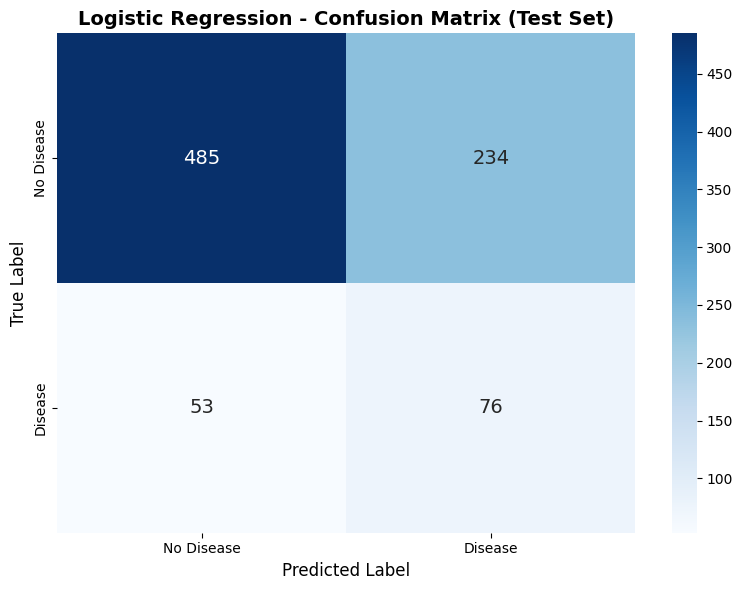

In [127]:
# Visualization of confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))

# Create heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'],
            cbar=True, ax=ax, annot_kws={'size': 14})

ax.set_title('Logistic Regression - Confusion Matrix (Test Set)', fontsize=14, fontweight='bold')
ax.set_ylabel('True Label', fontsize=12)
ax.set_xlabel('Predicted Label', fontsize=12)

plt.tight_layout()
plt.show()

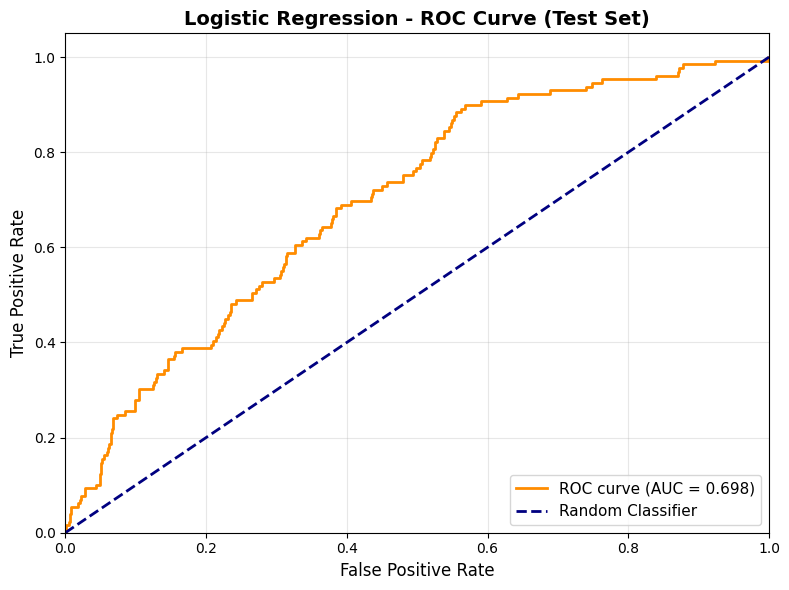

In [128]:
"""
ROC curve

ROC (Receiver Operating Characteristic) Curve:
    - Shows trade-off between true positive rate and false positive rate
    - Area under curve (AUC) is a single metric (0-1)
    - Higher AUC = better at distinguishing classes
"""

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')

ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_ylabel('True Positive Rate', fontsize=12)
ax.set_title('Logistic Regression - ROC Curve (Test Set)', fontsize=14, fontweight='bold')
ax.legend(loc="lower right", fontsize=11)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

            Feature  Coefficient
0               age     0.524783
8              male     0.256949
1        cigsPerDay     0.256597
3             sysBP     0.248651
7           glucose     0.142693
12     prevalentHyp     0.142660
10           BPMeds     0.106954
2           totChol     0.093273
11  prevalentStroke     0.061990
13         diabetes     0.053347
4             diaBP     0.051170
9     currentSmoker     0.033698
14        education    -0.029171
5               BMI     0.022648
6         heartRate    -0.017361



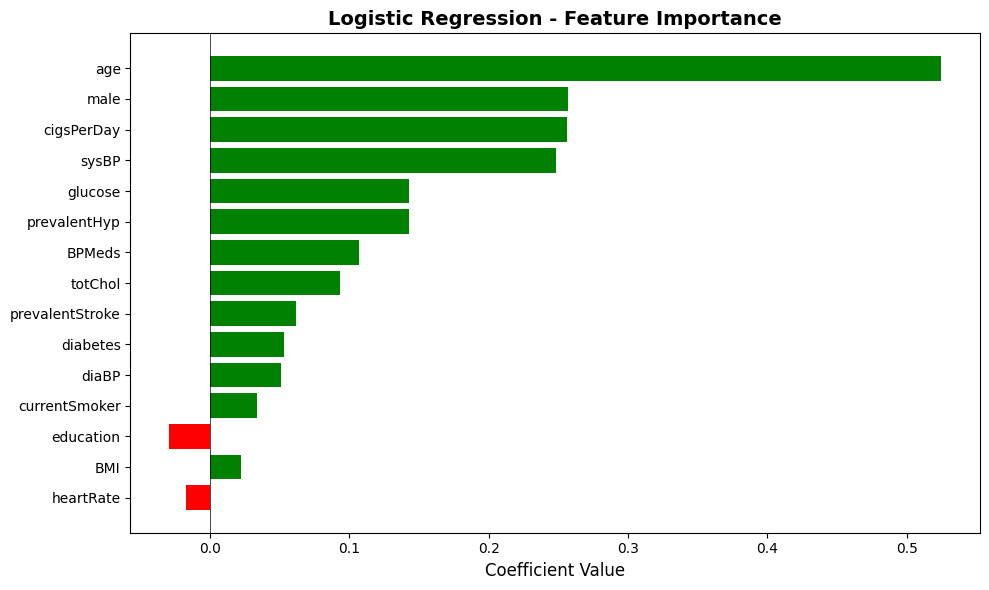

In [134]:
# Feature importance
# Logistic Regression coefficients show how much each feature influences prediction
# Green bars (positive) - increase risk of disease
# Red bars (negative) - decrease risk of disease

feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr_model.coef_[0]
})

feature_importance['Abs_Coefficient'] = np.abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

print(feature_importance[['Feature', 'Coefficient']])
print()

# Visualize features
fig, ax = plt.subplots(figsize=(10, 6))

colors = ['red' if x < 0 else 'green' for x in feature_importance['Coefficient']]

ax.barh(range(len(feature_importance)), feature_importance['Coefficient'].values, color=colors)
ax.set_yticks(range(len(feature_importance)))
ax.set_yticklabels(feature_importance['Feature'].values)
ax.set_xlabel('Coefficient Value', fontsize=12)
ax.set_title('Logistic Regression - Feature Importance', fontsize=14, fontweight='bold')
ax.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
ax.invert_yaxis()

plt.tight_layout()
plt.show()

In [ ]:
print("KEY FINDINGS:")
print(f"  - CV Recall: {cv_results['test_recall'].mean():.1%}")
print(f"    (Catches {cv_results['test_recall'].mean():.1%} of disease cases)")
print()
print(f"  - Test ROC-AUC: {test_roc_auc:.4f}")
print()
print(f"  - Most important features: {', '.join(feature_importance.head(3)['Feature'].values)}")
print()

KEY FINDINGS:
  - CV Recall: 68.7%
    (Catches 68.7% of disease cases)

  - Test ROC-AUC: 0.6983
    (Good discrimination between classes)

  - Most important features: age, male, cigsPerDay

